### Обзор и предобработка данных

In [160]:
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

#### Обзор данных

In [162]:
data_act.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [163]:
data_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [170]:
data_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [171]:
data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


**ВЫВОД**  
- В каждой строке таблицы data_act - информация о действии пользователя (дата, идентификатор пользователя, действие)
Есть пропуски в столбцах, в дальнейшем надо проверить, нуждаются ли они в заполнении. Столбец event_datetime нужно преобразовать в дату, возможно, добавить еще отдельный столбец только с датой события (чтобы подсчитать стоимость клика).

В таблице 135640 строк, 13576 уникальных пользователей.

- В таблице data_source информация о том, из какого рекламного источника пришел пользователь. Пропусков нет.



#### Предобработка данных

In [189]:
data_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135640 non-null  datetime64[ns]
 1   event           135640 non-null  object        
 2   building_type   135640 non-null  object        
 3   user_id         135640 non-null  object        
 4   project_type    135640 non-null  object        
 5   event_date      135640 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 6.2+ MB


In [190]:
print(f'Минимальная дата в датафрейме',data_act['event_date'].min())
print(f'Максимальная дата в датафрейме', data_act['event_date'].max())

Минимальная дата в датафрейме 2020-05-04
Максимальная дата в датафрейме 2020-06-05


#### Проверка дубликатов

In [192]:
data_act.duplicated().sum()

1

Дубликат один, можно удалить.

### Исследовательский анализ данных

#### Проанализировать источники перехода

Объединю таблицу data_act и data_source.

In [194]:
data_act = data_act.merge(data_source, on='user_id', how='left')
data_act.head()

,event_datetime,event,building_type,user_id,project_type,event_date,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,,2020-05-04,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,,2020-05-04,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,,2020-05-04,instagram_new_adverts
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,,2020-05-04,facebook_ads
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,,2020-05-04,yandex_direct


In [257]:
# Подсчитаю количество уникальных пользователей, пришедших из каждого источника
users_count_by_source = (data_act
                                .pivot_table(index = 'source', 
                                             values = 'user_id', 
                                             aggfunc= 'nunique')
                                 .sort_values(by = 'user_id')
                                 .reset_index())
users_count_by_source.head()

,source,user_id
0,youtube_channel_reklama,2686
1,facebook_ads,2726
2,instagram_new_adverts,3347
3,yandex_direct,4817


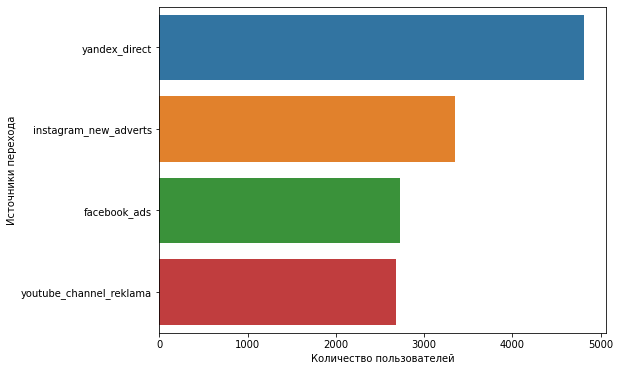

In [272]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'user_id', y = 'source' , data = users_count_by_source.sort_values(by = 'user_id', ascending=False))
#plt.title('Распределение пользователей по источникам перехода')
plt.xlabel('Количество пользователей')
plt.ylabel('Источники перехода');

Больше всех пользователей приходит из Яндекс_Директ.

#### Проверить, есть ли связь между источником перехода и выбором стратегии игры (постройка проекта или война)


In [196]:
users_by_events = (data_act
            .pivot_table(index = 'source', 
                         values = 'user_id', 
                         columns = ['event','project_type'], 
                         aggfunc='nunique')
             .reset_index())
users_by_events

event,source,building,finished_stage_1,project
project_type,,,,satellite_orbital_assembly
0,facebook_ads,2726,1150,391
1,instagram_new_adverts,3347,1466,476
2,yandex_direct,4817,2042,620
3,youtube_channel_reklama,2686,1159,379


In [200]:
users_by_events

event,source,building,finished_stage_1,project,share_finshed,share_project
project_type,,,,satellite_orbital_assembly,,
0,facebook_ads,2726,1150,391,42.0,34.0
1,instagram_new_adverts,3347,1466,476,44.0,32.0
2,yandex_direct,4817,2042,620,42.0,30.0
3,youtube_channel_reklama,2686,1159,379,43.0,33.0


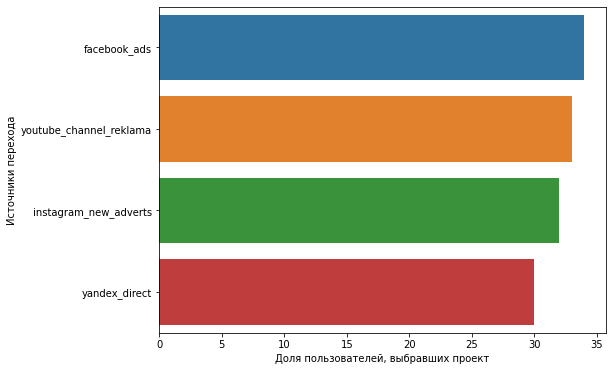

In [273]:
plt.figure(figsize=(8, 6))
sns.barplot(x = 'share_project', y = 'source' , data = users_by_events.sort_values(by = 'share_project', ascending=False))
#}plt.title('Зависимость стратегии игры от источника перехода')
plt.xlabel('Доля пользователей, выбравших проект')
plt.ylabel('Источники перехода');

Отношение пользователей, закончивших уровень, построив проект, к количеству пользователей, прошедших первый уровень, почти одинаков у пользователей из разных источников - от 30 до 34 процентов.  
Самый маленький у yandex_direct - 30%.
Делаю вывод, что связи между источником перехода и выбором стратегии игры нет.

#### Проверить, есть ли связь между источником перехода и временем завершения уровня

Создам три датафрейма - пользователи, закончившие уровень (чтобы получить дату завершения уровня), пользователи, закончившие проект и пользователи, закончившие уровень победой над врагом.

In [207]:
profiles = profiles.merge(project_data, on = 'user_id', how = 'outer')

In [208]:
profiles.head()

,user_id,start_date,source_x,event,project_type,source_y,way
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,facebook_ads,building,,NaN,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,yandex_direct,building,,NaN,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,youtube_channel_reklama,building,,NaN,NaN
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,finished_stage_1,,NaN,NaN
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,facebook_ads,building,,NaN,NaN


In [221]:
profiles['time'] = (profiles['finish_date'] - profiles['start_date']).dt.total_seconds()/360

In [223]:
profiles.head()

,user_id,start_date,source_x,event,project_type,finish_date,way,time
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,facebook_ads,building,,NaT,,0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,yandex_direct,building,,NaT,,0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,youtube_channel_reklama,building,,NaT,,0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,finished_stage_1,,2020-05-12 07:40:47,win,1546.45
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,facebook_ads,building,,NaT,,0


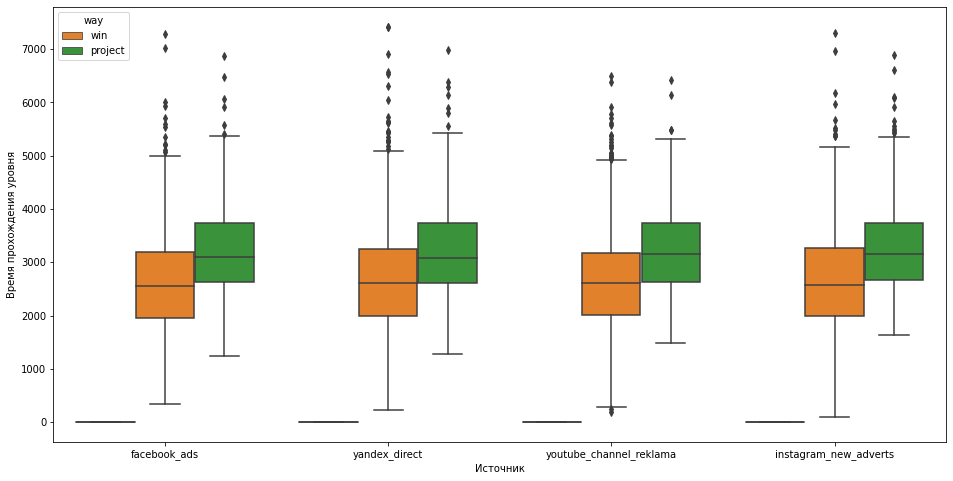

In [275]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='source_x', y='time', hue = 'way', data=profiles)
plt.xlabel('Источник')
plt.ylabel('Время прохождения уровня');
#plt.title("Зависимость времени прохождения уровня от источника перехода"); 

Не вижу разницы между пользователями, пришедшими из разных источников.

**ВЫВОД**  
Нет связи между источником и поведениеми пользователя.

### Проверка гипотез

#### Первая гипотеза - время завершения уровня различается в зависимости от способа прохождения

Поделю пользователей на тех, кто закончил уровень победой и тех, кто закончил уровень завершением проекта.

In [228]:
projecter = profiles.query('way=="project"')
projecter['time'].describe()

count    1866.000000
mean     3230.136486
std       841.838825
min      1233.741667
25%      2628.329861
50%      3127.613889
75%      3737.899306
max      6992.286111
Name: time, dtype: float64

In [229]:
winner = profiles.query('way=="win"')
winner['time'].describe()

count    3951.000000
mean     2665.066878
std       982.984132
min        96.502778
25%      1990.220833
50%      2590.269444
75%      3225.548611
max      7419.813889
Name: time, dtype: float64

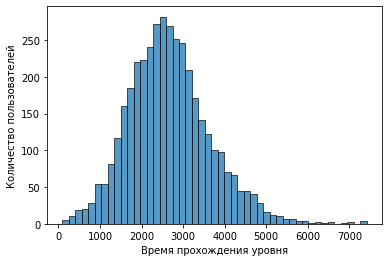

In [230]:
sns.histplot(winner['time'])
plt.xlabel('Время прохождения уровня')
plt.ylabel('Количество пользователей');

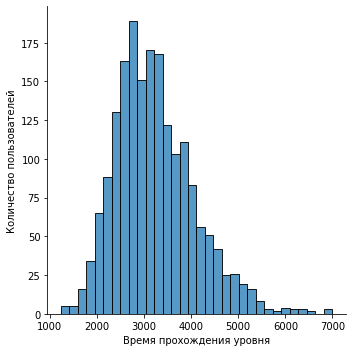

In [231]:
sns.displot(projecter['time'])
plt.xlabel('Время прохождения уровня')
plt.ylabel('Количество пользователей');

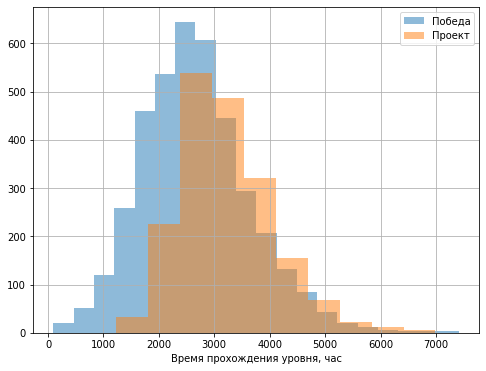

In [276]:
plt.figure(figsize=(8, 6))
winner['time'].hist(alpha=0.5, bins=20, label = 'Победа')
plt.legend()
projecter['time'].hist(alpha=0.5, bins=10, label='Проект')
plt.legend()
plt.xlabel("Время прохождения уровня, час")
#plt.title('Зависимость времени прохождения уровня от стратегии игры')
plt.show()

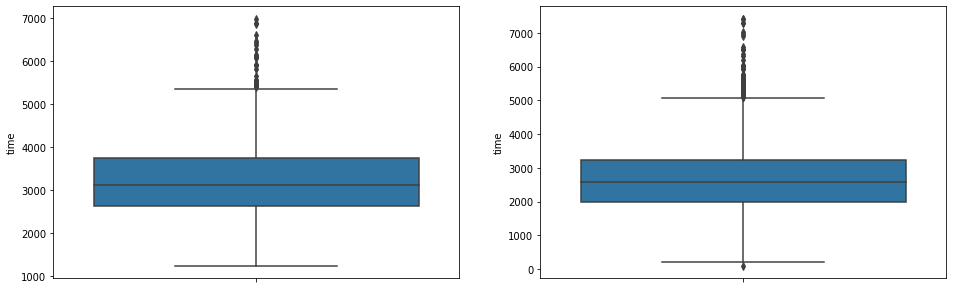

In [233]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(y ='time', data=projecter, ax=axes[0])
sns.boxplot(y ='time', data=winner, ax=axes[1]);

Формулируем гипотезы  
H0 - среднее время завершения уровня равно у тех, кто победил врага и кто завершил проект.  
Н1 - среднее время различается.

Для проверки гипотез использую  t-тест.  
Поскольку выборки различаются по размеру, указываю параметр equal_var = False

In [234]:
from scipy import stats as st
import numpy as np

In [235]:
gamer_1 = projecter['time']
gamer_2 = winner['time']
alpha = .05 

In [237]:
results = st.ttest_ind(
    gamer_1, 
    gamer_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 5.708058235070037e-107
Отвергаем нулевую гипотезу


Полученные данные дают основания отвергнуть нулевую гипотезу, то есть, можем предополагать, что время прохождения уровня зависит от выбора стратегии прохождения.

#### Вторая гипотеза - количество построенных объектов зависит от способа прохождения


Посчитаю количество зданий на пользователя.

Добавлю количество построенных объектов в таблицы с данными.

In [242]:
winner = pd.merge(winner, users_building[['user_id','object_count']], on = 'user_id', how = 'left')
winner.head()

,user_id,start_date,source_x,event,project_type,finish_date,way,time,object_count
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,instagram_new_adverts,finished_stage_1,,2020-05-12 07:40:47,win,1546.450000,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,instagram_new_adverts,finished_stage_1,,2020-05-17 21:47:49,win,3012.791667,8
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,facebook_ads,finished_stage_1,,2020-05-16 19:57:40,win,3068.347222,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,yandex_direct,finished_stage_1,,2020-05-15 16:02:01,win,2714.422222,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,instagram_new_adverts,finished_stage_1,,2020-05-16 13:48:39,win,1459.811111,3


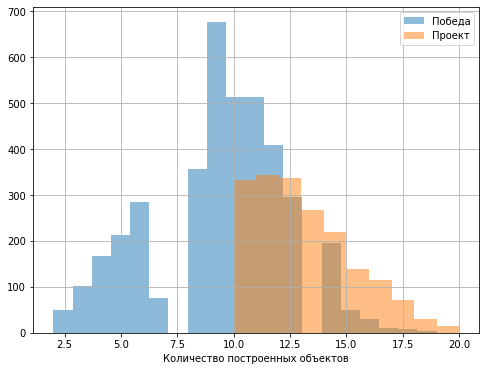

In [244]:
plt.figure(figsize=(8, 6))
winner['object_count'].hist(alpha=0.5, bins=20, label = 'Победа')
plt.legend()
projecter['object_count'].hist(alpha=0.5, bins=10, label='Проект')
plt.legend()
plt.xlabel("Количество построенных объектов")
plt.show()

H0 Среднее количество объектов, построенних игроками, закончившими проект, равно количеству объектов, построенных победившими игроки.  
Н1 Среднее количество объектов в группах различается.

In [245]:
gamer_p = projecter['object_count']
gamer_w = winner['object_count']
alpha = .05
results = st.ttest_ind(
    gamer_p, 
    gamer_w,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


Полученные данные дают основания отвергнуть нулевую гипотезу, то есть, можем предополагать, что количество построенных объектов зависит от выбора стратегии прохождения.

### Вывод

Исследуемый датафрейм состоит из 135640 строк. Пропуски заменены на пустое значение, удалена 1 продублированная строка.
В датасете 13576 уникальных пользователей, пришедших из четырех источников. Больше всего пользователей приходит из Яндекс.Директ.  
При исследовании данных не выявлено связи между источниками перехода и выбором стратегии игры, а так же между источником перехода и временем завершения уровня.  
Было рассмотрено две гипотезы.  
Первая гипотеза - есть основания предполагать, что время прохождения уровня зависит от выбора стратегии прохождения (победа или заврешение проекта).  
Вторая гипотеза - есть основания предполагать, что количество построенных объектов зависит от 
выбора стратегии прохождения.